# Análise da diferença salarial para trabalhadores de TI conforme a raça de cada indivíduo.

Aqui é realizado as análises de quantidade de pessoas e diferença salarial entre homens e mulheres
com funções trabalhistas de TI distribuídos em qualquer setor produtivo no Brasil, 
conforme a raça de cada indivíduo em 2021.

## Etapas iniciais para realização das análises:

### Imports necessários para realização dos processamentos e análises:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

# Opções gerais necessárias:
pd.options.display.float_format = "{:,.2f}".format

### Variáveis inicias importantes utilizadas durante a realização dos processamentos e análises:

In [3]:
# Criando indices dos sexos:
sexo = {1: 'Masc.', 2: 'Fem.'}

# Criando indices das raças:
raca_2021 = {1: 'Indigena', 2: 'Branca', 4: 'Preta', 6: 'Amarela', 8: 'Parda'}

# Variável com o nível de confiança a ser considerado e utilizado:
nivel_confianca = 0.01

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Definição das cores para cada sexo (masc: verde pastel, fem: laranja pastel)
color_masc = pal[2]
color_fem = pal[1]

### Etapa de leitura dos dados das tabelas em CSV:

In [4]:
# Leitura da tabela de dados separados por setores da TI:
RAIS_GERAL_2021 = pd.read_csv("C:/Users/leila/estagio/data/raw/DATA_RAIS_GERAL_2021.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2021.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE', 'Escolaridade após 2005':'Escolaridade',
                            'Raça Cor':'Raça', 'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

### Correção da coluna de raça para utilização correta:

In [5]:
RAIS_GERAL_2021 = RAIS_GERAL_2021[RAIS_GERAL_2021["Raça"] != 9]
RAIS_GERAL_2021 = RAIS_GERAL_2021[RAIS_GERAL_2021["Raça"] != 99]

### Correção da inflação do período analisado até o atual das remunerações pelo fator de correção INPC (IBGE):

In [6]:
# Foi utilizado o Índice Nacional de Preços ao Consumidor (INPC - IBGE).

# Índice de correção de inflação para o período de 12/2021
# até 09/2023 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2021 = 1.01122970

RAIS_GERAL_2021["Remuneração"] = RAIS_GERAL_2021["Remuneração"] * fator_correcao_inflacao_2021

### Exibição das tabelas gerais para cada ano:

In [7]:
# Exibindo os cinco primeiros dados da tabela:
RAIS_GERAL_2021.head()

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,MS,317210,85201,1,21,8,"1,372.23",1
3,MS,212405,72100,1,22,8,"4,550.53",1
4,MS,317205,47717,1,30,8,"5,256.67",1
5,MS,317110,43215,1,41,8,"2,538.94",1
6,MS,212415,47440,3,37,8,"5,056.15",1


## Análise da frequência (quantidade de pessoas) dos dados entre homens e mulheres distribuídos conforme a raça de cada indivíduo:

### Criação das tabelas para relatório e tabela para formação do gráfico:

In [8]:
# Tabela principal para quantidade:
RAIS_GERAL_2021_QNT = pd.crosstab(RAIS_GERAL_2021["Raça"].replace(raca_2021), RAIS_GERAL_2021["Sexo"].replace(sexo))
RAIS_GERAL_2021_QNT.insert(1, "% Fem.", RAIS_GERAL_2021_QNT["Fem."] / (RAIS_GERAL_2021_QNT["Fem."] + RAIS_GERAL_2021_QNT["Masc."]) * 100)
RAIS_GERAL_2021_QNT.insert(3, "% Masc.", RAIS_GERAL_2021_QNT["Masc."] / (RAIS_GERAL_2021_QNT["Fem."] + RAIS_GERAL_2021_QNT["Masc."]) * 100)

RAIS_GERAL_2021_QNT.head(7)

Sexo,Fem.,% Fem.,Masc.,% Masc.
Raça,,,,
Amarela,2700,26.99,7302,73.01
Branca,78581,20.81,299084,79.19
Indigena,222,20.27,873,79.73
Parda,28559,19.14,120674,80.86
Preta,5876,21.39,21593,78.61


In [9]:
# Tabela para gráfico da quantidade:
RAIS_GERAL_2021_QNT["Total"] = RAIS_GERAL_2021_QNT["% Masc."] + RAIS_GERAL_2021_QNT["% Fem."]
RAIS_GERAL_2021_QNT["Ano"] = "2021"

# Junção das tabelas anteriores em uma para geração do gráfico:
RAIS_GERAL_QNT_GRAF = pd.concat([RAIS_GERAL_2021_QNT]).reset_index()

### Criação do gráfico com os dados referentes a quantidade:

C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.Categoric

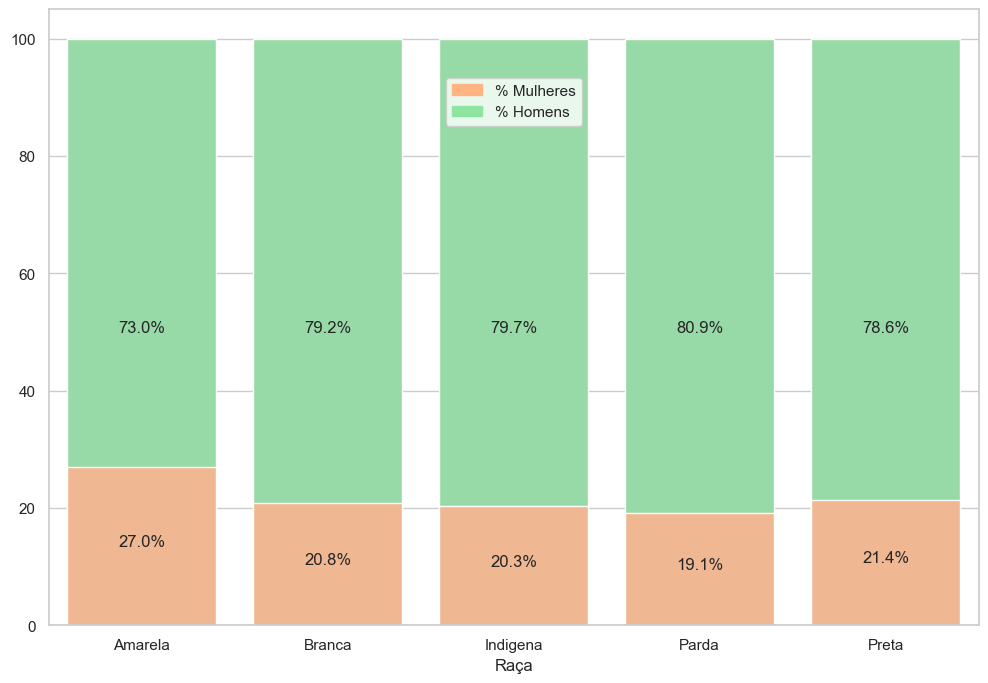

In [11]:
# Montagem inicial da imagem do gráfico:
plt.figure(figsize=(12, 8))

# Configuração da grid da imagem:
sns.set(style="whitegrid")

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Criação da primeira barra, referente ao total de 100% que fica atrás pela próxima barra:
bar1 = sns.barplot(x="Raça", y="Total", hue="Ano", data=RAIS_GERAL_QNT_GRAF, palette={"2021": color_masc})

# Captura da quantidade de barras existentes até o momento:
patches = bar1.patches

# Escrita da porcentagem para cada barra existente até o momento (porcentagem dos homens):
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar1.annotate('{:.1f}%'.format(RAIS_GERAL_QNT_GRAF["% Masc."][i]), (x, y), ha='center')
   

# Criação da segunda barra, referente a porcentagem das mulheres:
bar2 = sns.barplot(x="Raça", y="% Fem.", hue="Ano", data=RAIS_GERAL_QNT_GRAF, palette={"2021": color_fem})

# Finalização de configurações de exibição do gráfico:
top_bar = mpatches.Patch(label='% Mulheres', color=color_fem)
bottom_bar = mpatches.Patch(label='% Homens', color=color_masc)
plt.legend(handles=[top_bar, bottom_bar], loc='center', bbox_to_anchor=(.45, .8, .1, .1))

# Adicionar rótulos com as porcentagens femininas nas barras
for i in bar2.patches:
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy()
    if height < 100.0:
        bar2.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center')

plt.ylabel('')  # Remover o título do eixo y

plt.savefig("C:/Users/leila/estagio/data/figures/svg/qnt_sexo_raca.svg")

## Análise das médias salariais e diferenças:

### Distribuição da remuneração para cada sexo cruzado pela raça:

In [10]:
# Criação da tabela para o boxplot 
RAIS_GERAL_2021_BOX = RAIS_GERAL_2021
RAIS_GERAL_2021_BOX["Sexo"].replace(sexo, inplace = True)
RAIS_GERAL_2021_BOX["Raça"].replace(raca_2021, inplace = True)

RAIS_GERAL_2021_BOX

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,MS,317210,85201,1,21,Parda,"1,372.23",Masc.
3,MS,212405,72100,1,22,Parda,"4,550.53",Masc.
4,MS,317205,47717,1,30,Parda,"5,256.67",Masc.
5,MS,317110,43215,1,41,Parda,"2,538.94",Masc.
6,MS,212415,47440,3,37,Parda,"5,056.15",Masc.
...,...,...,...,...,...,...,...,...
680327,RS,212420,62040,11,28,Branca,"14,102.01",Fem.
680328,RS,212420,62040,11,39,Branca,"10,972.72",Fem.
680329,RS,212215,62015,11,37,Branca,"5,056.15",Fem.
680330,RS,212410,62023,11,41,Parda,"4,664.91",Fem.


C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.Categoric

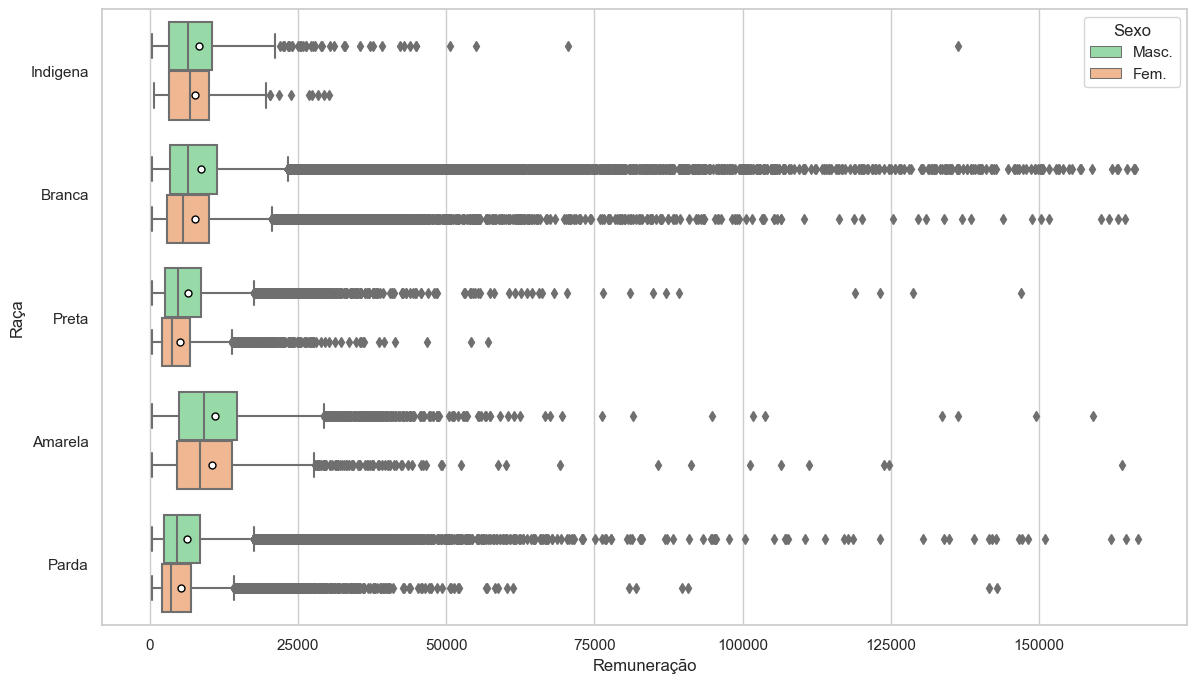

In [11]:
# Criação do boxplot:
box = sns.boxplot(x = 'Remuneração', y = 'Raça', hue = 'Sexo', data = RAIS_GERAL_2021_BOX, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = raca_2021.values(),
                       palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(14, 8)
box.figure.savefig("C:/Users/leila/estagio/data/figures/png/boxplot_sexo_raca_2021.png", dpi = 300)

### Criação das tabelas com as diferenças salarias e da tabela para geração do gráfico:

In [12]:
# Tabela principal para média e diferença salarial em 2009:
RAIS_GERAL_2021_MEDIA = pd.crosstab(RAIS_GERAL_2021["Raça"].replace(raca_2021), RAIS_GERAL_2021["Sexo"].replace(sexo), values = RAIS_GERAL_2021.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2021_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2021_MEDIA["Fem."] - RAIS_GERAL_2021_MEDIA["Masc."]) / RAIS_GERAL_2021_MEDIA["Masc."]) * 100)

RAIS_GERAL_2021_MEDIA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
Raça,,,
Amarela,"10,458.06","10,981.41",-4.77
Branca,"7,574.57","8,607.56",-12.00
Indigena,"7,656.10","8,304.28",-7.81
Parda,"5,287.46","6,370.39",-17.00
Preta,"5,200.74","6,441.48",-19.26


In [13]:
RAIS_GERAL_2021_MEDIA["Ano"] = "2021"

RAIS_GERAL_MEDIA_GRAF = pd.concat([RAIS_GERAL_2021_MEDIA]).reset_index()

C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.Categoric

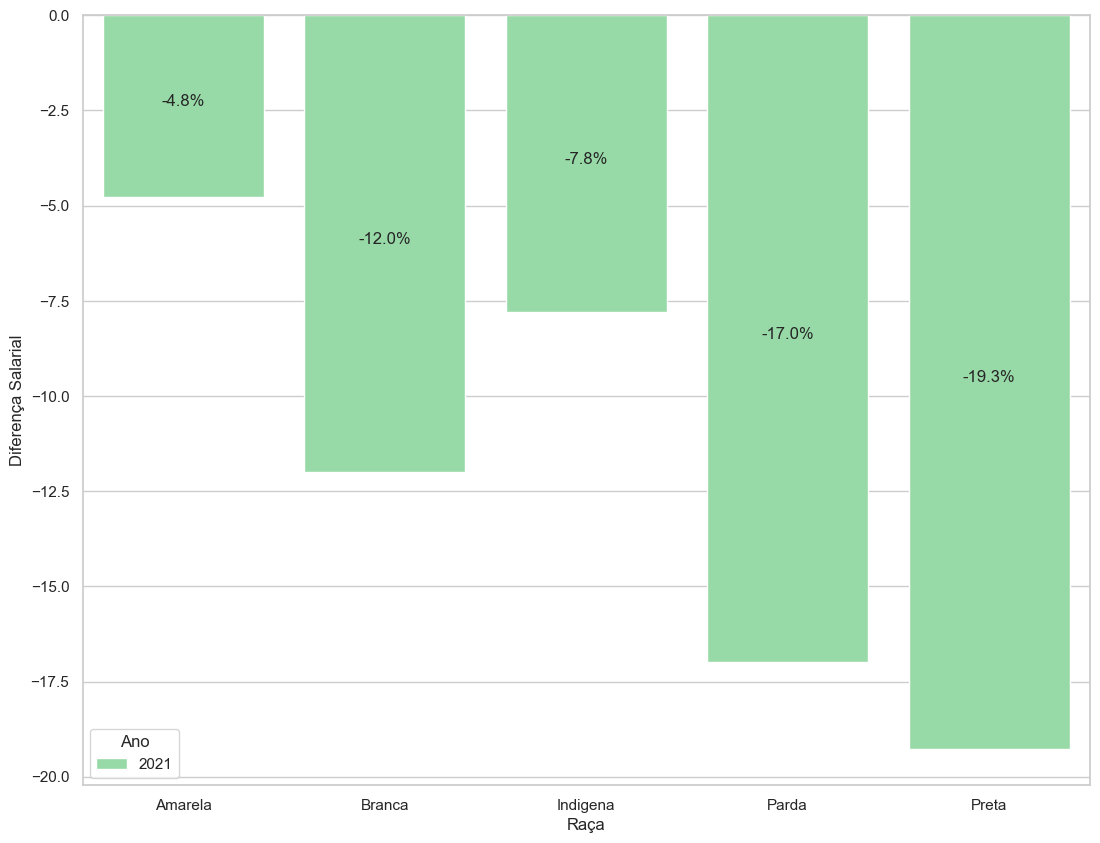

In [14]:
# Criação do gráfico inicial:
plt.figure(figsize = (13, 10))

# Configuração do grid do gráfico:
sns.set(style = "whitegrid")

# Criação da barra referente as diferenças salarias:
bar = sns.barplot(x = "Raça", y = "Diferença Salarial", hue = "Ano", data = RAIS_GERAL_MEDIA_GRAF, palette = {"2021": color_fem,"2021": color_masc})

# Captura da quantidade de barras existentes:
patches = bar.patches

# Preenchimento das porcentagens das diferenças salariais em cada barra:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar.annotate('{:.1f}%'.format(RAIS_GERAL_MEDIA_GRAF["Diferença Salarial"][i]), (x, y), ha='center')

plt.savefig("C:/Users/leila/estagio/data/figures/svg/dif_salarial_sexo_raca_media.svg")

In [15]:
# Tabela principal para mediana e diferença salarial em 2009:
RAIS_GERAL_2021_MEDIANA = pd.crosstab(RAIS_GERAL_2021["Raça"].replace(raca_2021), RAIS_GERAL_2021["Sexo"].replace(sexo), values = RAIS_GERAL_2021.Remuneração, aggfunc = 'median')
RAIS_GERAL_2021_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2021_MEDIANA["Fem."] - RAIS_GERAL_2021_MEDIANA["Masc."]) / RAIS_GERAL_2021_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2021_MEDIANA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
Raça,,,
Amarela,"8,540.83","9,135.10",-6.51
Branca,"5,561.76","6,469.50",-14.03
Indigena,"6,845.78","6,525.49",4.91
Parda,"3,640.83","4,544.57",-19.89
Preta,"3,807.39","4,746.78",-19.79


In [16]:
RAIS_GERAL_2021_MEDIANA["Ano"] = "2021"

RAIS_GERAL_MEDIANA_GRAF = pd.concat([RAIS_GERAL_2021_MEDIANA]).reset_index()

C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.Categoric

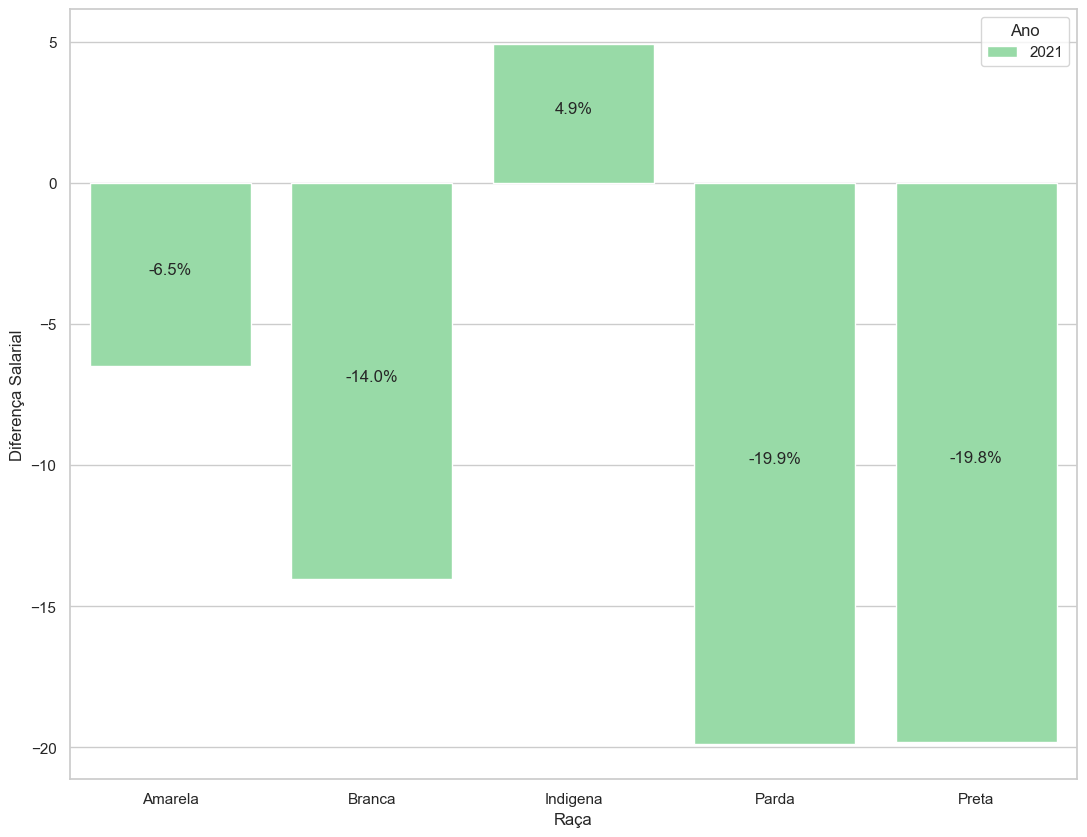

In [17]:
# Criação do gráfico inicial:
plt.figure(figsize = (13, 10))

# Configuração do grid do gráfico:
sns.set(style = "whitegrid")

# Criação da barra referente as diferenças salarias:
bar = sns.barplot(x = "Raça", y = "Diferença Salarial", hue = "Ano", data = RAIS_GERAL_MEDIANA_GRAF, palette = {"2021": color_fem,"2021": color_masc})

# Captura da quantidade de barras existentes:
patches = bar.patches

# Preenchimento das porcentagens das diferenças salariais em cada barra:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar.annotate('{:.1f}%'.format(RAIS_GERAL_MEDIANA_GRAF["Diferença Salarial"][i]), (x, y), ha='center')

plt.savefig("C:/Users/leila/estagio/data/figures/svg/dif_salarial_sexo_raca_mediana.svg")

### Teste de hipótese para cada grupo de médias por CBOs: RESOLVER

In [18]:
def teste_hipotese(first_data, second_data, confidence_interval):
    from scipy.stats import mannwhitneyu 
    
    stat, p_valor = mannwhitneyu(first_data, second_data, alternative = 'less')
    
    if p_valor <= confidence_interval:
        return stat, p_valor, 'Medianas estatisticamente diferentes'
    else:
        return stat, p_valor, 'Medianas estatisticamente iguais'

In [19]:
TESTE_HIP_2021 = pd.DataFrame(columns = ['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for raca in raca_2021:
    df1 = RAIS_GERAL_2021.query("Sexo == 'Masc.'").replace(raca_2021).query("Raça == '{}'".format(raca_2021[raca])).Remuneração
    df2 = RAIS_GERAL_2021.query("Sexo == 'Fem.'").replace(raca_2021).query("Raça == '{}'".format(raca_2021[raca])).Remuneração

    mean1 = df1.median()
    mean2 = df2.median()

    if mean1 < mean2:
        stat, p, result= teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2021.loc[raca_2021[raca]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]

RAIS_GERAL_2009_HIP = pd.merge(RAIS_GERAL_2021_MEDIA, TESTE_HIP_2021, left_index=True, right_index=True)
RAIS_GERAL_2009_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2009_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2009_HIP.head(7)

,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
Amarela,"10,458.06","10,981.41",9362086.5,0.01 > 0.00006...,Medianas estatisticamente diferentes
Branca,"7,574.57","8,607.56",10670870643.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
Indigena,"7,656.10","8,304.28",98931.5,0.01 > 0.68519...,Medianas estatisticamente iguais
Parda,"5,287.46","6,370.39",1488936814.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
Preta,"5,200.74","6,441.48",53678310.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
